## Notebook analysing data printed by the tested android device at TÜV-Nord
The .txt files in the data directory contain printed information of an android device. This needs to be categorized, clustered and finally analyzed and compared to the _VBOX_ data in the **CrashAnalytics** Notebook.

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
matplotlib.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = (14.0, 11.0)

from LogReader import read_device_log

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
res = read_device_log('data/tuev22I.txt')

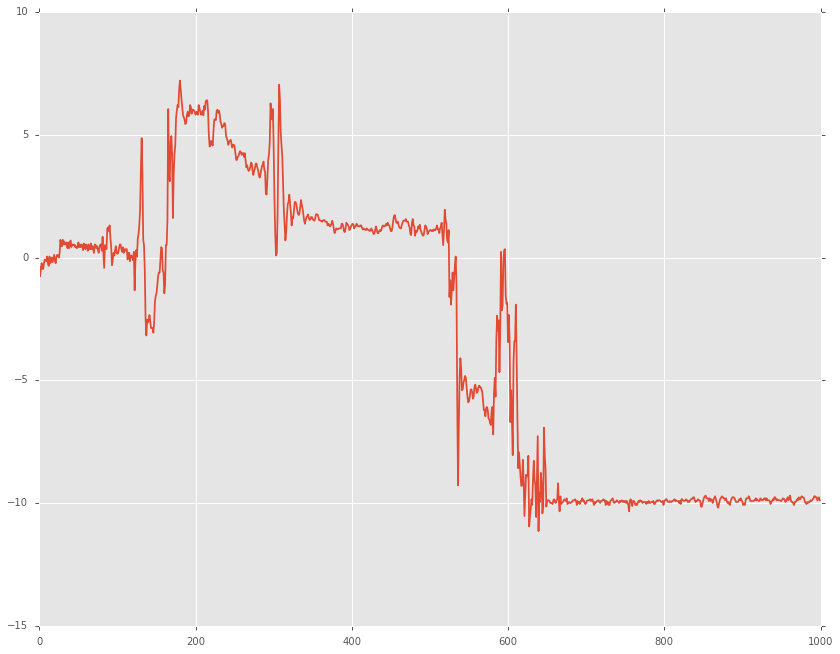

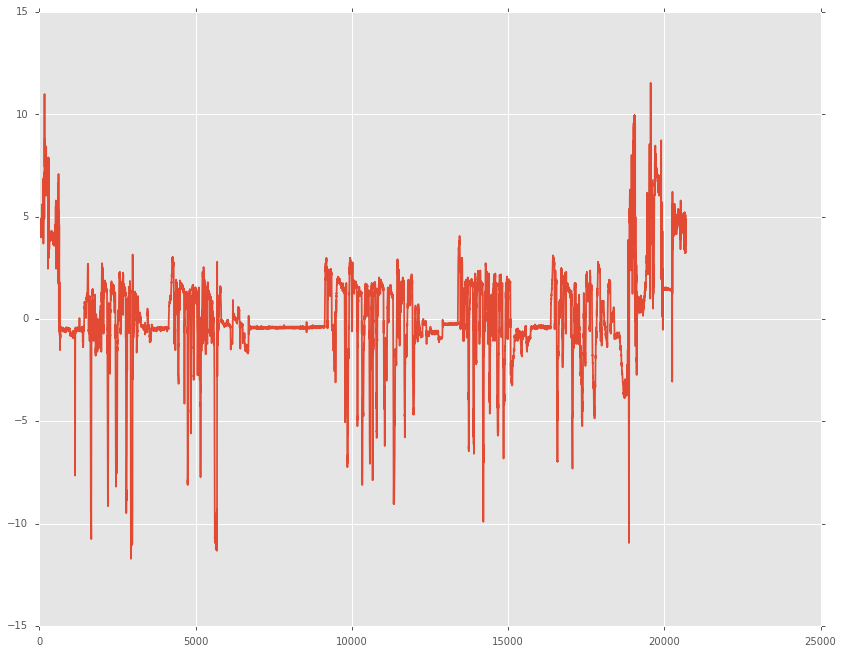

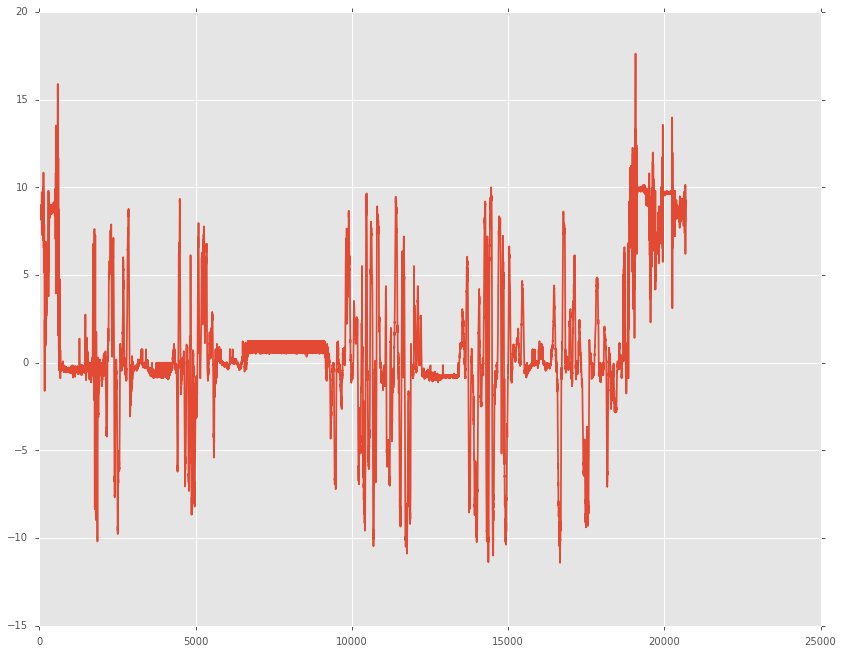

In [25]:
plt.plot(res['acc_x'][:1000])
plt.show()

plt.plot(res['acc_y'])
plt.show()

plt.plot(res['acc_z'])
plt.show()